In [1]:
import umap

In [2]:
import umap.plot

In [4]:
import pandas as pd
import numpy as np

# Asperger

In [5]:
#all reviewed by Alessandro de Luca
as_all = pd.read_csv('AS_mfcc_all.csv')

In [7]:
as_all['Noise'] = as_all['Noise'].str.replace('NC', 'Conv')

In [8]:
as_all

,Talkers,Category,Noise,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15
0,AS1,AS,Conv,208.480211,-32.474996,168.363254,-41.114858,31.809224,-19.889283,-21.402989,-26.228574,-25.155791,-9.196864,-2.440894,-2.817047,-18.214502,18.020519,-3.034508
1,AS1,AS,Conv,270.664378,-20.722133,139.788616,-35.220352,7.034986,-19.977288,-16.346810,-27.766382,-4.311545,-18.520736,-8.414162,8.555285,-5.754188,17.580846,-14.848510
2,AS1,AS,Conv,249.322179,-67.676274,132.812188,-27.632850,37.771537,-20.816957,-28.148657,-39.379610,-32.890430,-8.178062,13.065366,-3.949489,-10.852909,22.666444,-13.021214
3,AS1,AS,Conv,261.123264,-24.951718,149.267459,-62.709451,29.094878,0.429277,-15.560310,-25.800503,-23.362795,-24.250241,0.846294,-2.174278,-14.722826,16.978937,-15.230172
4,AS1,AS,Conv,228.413142,-93.558748,154.503551,-23.322809,38.091493,-26.858157,-46.627981,-40.088524,-9.939046,-11.376728,3.256977,0.570589,-20.066936,17.756410,-13.193825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2509,AS6,AS,babble,225.031749,-74.965602,129.540365,-61.115320,25.901046,-24.991159,-14.913354,-53.968384,-4.437689,-21.936211,3.632250,-0.418026,-9.034717,2.177599,-11.554815
2510,AS6,AS,babble,353.549718,-26.036442,96.094272,6.164866,36.328251,-44.481378,-20.677337,-26.786217,-4.972416,-31.375243,-0.931068,-5.343189,-12.078253,5.816278,-15.825540
2511,AS6,AS,babble,358.727260,-53.888680,90.194318,-34.568548,-5.639577,-53.255304,-30.214756,-41.924320,-12.557308,-36.439993,-8.562679,-16.221493,-22.772371,0.578707,-19.388633
2512,AS6,AS,babble,313.731062,-61.526351,124.238204,-10.619880,12.877470,-41.442706,-9.258033,-25.963047,-12.356793,-26.256090,6.114516,-15.291269,-11.395076,1.273370,-16.705715


In [62]:
data = as_all[['c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10', 'c11', 'c12', 'c13', 'c14', 'c15']].values

In [63]:
y = []
talkers = as_all['Talkers'].unique()
for name in as_all['Talkers']:
    y.append(np.where(talkers == name)[0][0])

y[-1]

5

# controls

In [3]:
c_all = pd.read_csv('C_mfcc_all.csv')

In [ ]:
c_all['Noise'] = c_all['Noise'].str.replace('NC', 'Conv')

In [65]:
c_all

,Talkers,Category,Noise,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15
0,C1,C,NC,316.984657,90.628231,112.283708,-2.502350,46.385209,2.110675,-30.422643,-4.570164,-16.797732,-9.181866,12.166999,12.400270,-14.432460,10.429566,1.328818
1,C1,C,NC,339.779315,102.244124,110.240414,-5.183838,40.058572,-5.375072,-37.337336,-9.850693,-19.646779,-13.836417,7.495911,23.398393,-14.798098,12.091419,0.885714
2,C1,C,NC,314.879729,64.921166,85.634473,1.431886,35.791645,-0.406514,-23.243140,16.151811,-15.728264,10.984293,7.149670,-6.168837,-22.306002,9.314205,10.208020
3,C1,C,NC,286.786180,63.362237,123.057427,10.325079,32.932199,2.268509,-14.334751,-3.169670,-24.095454,-4.381341,5.108140,-0.320575,-17.017453,16.716675,0.130125
4,C1,C,NC,305.827782,94.416378,124.802752,-6.718867,30.165850,-4.855270,-28.453086,-6.664454,-33.785405,-4.404229,6.703146,5.152931,-11.071226,20.636360,3.424895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2245,C6,C,babble,340.557549,-27.796397,124.290827,-37.245971,7.017202,-32.279425,-10.589155,-25.335129,7.616174,-13.069484,-7.189632,-8.027782,20.125858,20.474937,-6.450352
2246,C6,C,babble,341.200675,-50.436633,167.511617,-13.170953,3.606815,-47.349894,-17.137531,-26.720988,11.752673,-6.023419,-12.646114,-12.691301,9.206956,13.556553,-8.624441
2247,C6,C,babble,402.889013,-14.443075,107.183899,-15.268832,11.416282,-18.925253,-4.069016,-18.209266,28.525045,-9.021486,-13.324993,-10.658306,14.376271,10.024115,-5.726169
2248,C6,C,babble,369.739180,-35.315348,123.674994,-31.483664,25.349603,-12.715420,-9.409994,-26.586954,14.294080,-12.117409,-8.976639,-9.039336,11.901672,16.426696,-0.521138


In [66]:
data_ctrl = c_all[['c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10', 'c11', 'c12', 'c13', 'c14', 'c15']].values

In [67]:
y = []
talkers = c_all['Talkers'].unique()
for name in c_all['Talkers']:
    y.append(np.where(talkers == name)[0][0])

y[-1]

5

# plot Aspergers and Controls

In [4]:
df_all = pd.concat([as_all, c_all])

In [5]:
df_all.reset_index(inplace=True, drop=True)
df_all

,Talkers,Category,Noise,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15
0,AS1,AS,NC,208.480211,-32.474996,168.363254,-41.114858,31.809224,-19.889283,-21.402989,-26.228574,-25.155791,-9.196864,-2.440894,-2.817047,-18.214502,18.020519,-3.034508
1,AS1,AS,NC,270.664378,-20.722133,139.788616,-35.220352,7.034986,-19.977288,-16.346810,-27.766382,-4.311545,-18.520736,-8.414162,8.555285,-5.754188,17.580846,-14.848510
2,AS1,AS,NC,249.322179,-67.676274,132.812188,-27.632850,37.771537,-20.816957,-28.148657,-39.379610,-32.890430,-8.178062,13.065366,-3.949489,-10.852909,22.666444,-13.021214
3,AS1,AS,NC,261.123264,-24.951718,149.267459,-62.709451,29.094878,0.429277,-15.560310,-25.800503,-23.362795,-24.250241,0.846294,-2.174278,-14.722826,16.978937,-15.230172
4,AS1,AS,NC,228.413142,-93.558748,154.503551,-23.322809,38.091493,-26.858157,-46.627981,-40.088524,-9.939046,-11.376728,3.256977,0.570589,-20.066936,17.756410,-13.193825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4759,C6,C,babble,340.557549,-27.796397,124.290827,-37.245971,7.017202,-32.279425,-10.589155,-25.335129,7.616174,-13.069484,-7.189632,-8.027782,20.125858,20.474937,-6.450352
4760,C6,C,babble,341.200675,-50.436633,167.511617,-13.170953,3.606815,-47.349894,-17.137531,-26.720988,11.752673,-6.023419,-12.646114,-12.691301,9.206956,13.556553,-8.624441
4761,C6,C,babble,402.889013,-14.443075,107.183899,-15.268832,11.416282,-18.925253,-4.069016,-18.209266,28.525045,-9.021486,-13.324993,-10.658306,14.376271,10.024115,-5.726169
4762,C6,C,babble,369.739180,-35.315348,123.674994,-31.483664,25.349603,-12.715420,-9.409994,-26.586954,14.294080,-12.117409,-8.976639,-9.039336,11.901672,16.426696,-0.521138


In [7]:
data_all = df_all[['c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10', 'c11', 'c12', 'c13', 'c14', 'c15']].values

In [71]:
y = []
talkers = df_all['Talkers'].unique()
for name in df_all['Talkers']:
    y.append(np.where(talkers == name)[0][0])

y[-1]

11

In [72]:
reducer = umap.UMAP(target_weight=0.5, metric='manhattan', random_state=72)
embedding = reducer.fit_transform(
    X=data_all,
    y=np.array(y)
)
embedding.shape

(4764, 2)

<AxesSubplot:>

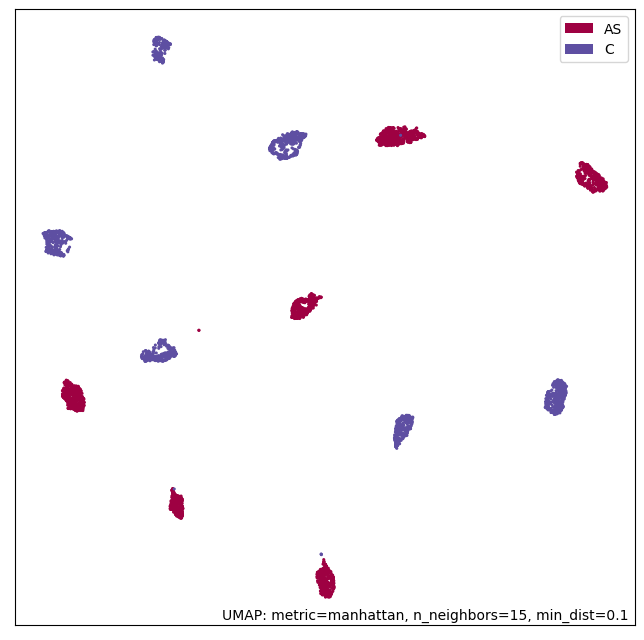

In [17]:
umap.plot.points(
    reducer, labels = df_all.Category.to_numpy()
)

<AxesSubplot:>

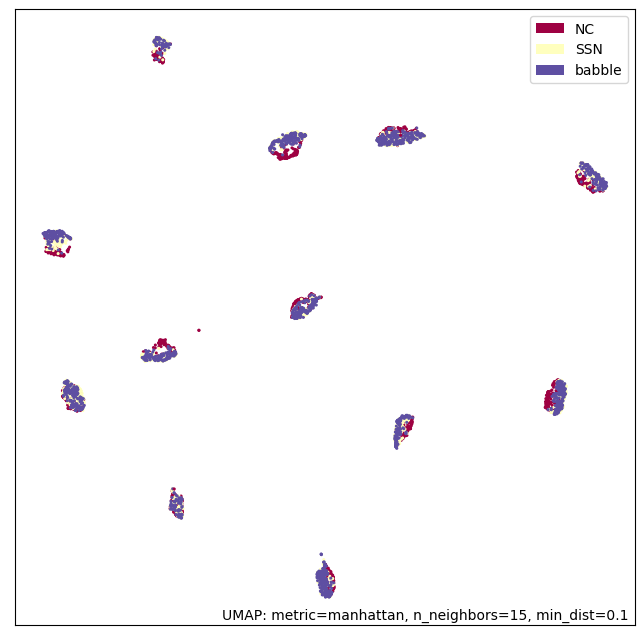

In [18]:
umap.plot.points(
    reducer, labels = df_all.Noise.to_numpy()
)

# Euclidean distances

In [31]:
# euclidean distances
# comparing SSN to NC/ babble to NC

talker = []
d = []
group = []


for name in df_all.Talkers.unique():
    reference = df_all.loc[
        (df_all['Talkers'] == name) & (df_all['Noise'] == 'NC') 
    ].index # reference idxs for talker x condition = NC

    avg_NC = np.mean(data_all[reference], axis = 0) # centroid of the talker in the NC condition

    reference = df_all.loc[
        (df_all['Talkers'] == name) & (df_all['Noise'] == 'babble') 
    ].index # reference idxs for talker x condition = SSN

    # distance talker x SSN (all) from mean(talker x NC)
    distance = np.sqrt(np.sum(np.square(data_all[reference]-avg_NC), axis=1))

    d.append(distance)
    talker.append([name]*len(distance))
    group.append(df_all.iloc[reference]['Category'].to_numpy()) 

In [32]:
euclid_dist = np.concatenate(d, axis=0)
talker = np.concatenate(talker, axis=0)
group = np.concatenate(group, axis=0)

In [33]:
euclidist_df = pd.DataFrame(
{
'Talker': talker,
'Category': group,
'distance_babble': euclid_dist
}
)
euclidist_df
#euclidist_df.to_csv('distance_to_babble.csv', encoding='utf-8', index=False)

,Talker,Category,distance_babble
0,AS1,AS,159.822962
1,AS1,AS,154.418591
2,AS1,AS,122.946931
3,AS1,AS,107.423351
4,AS1,AS,128.103916
...,...,...,...
1704,C6,C,54.121956
1705,C6,C,81.200427
1706,C6,C,53.235639
1707,C6,C,33.785329


# Distance between SSN and NC by speaker

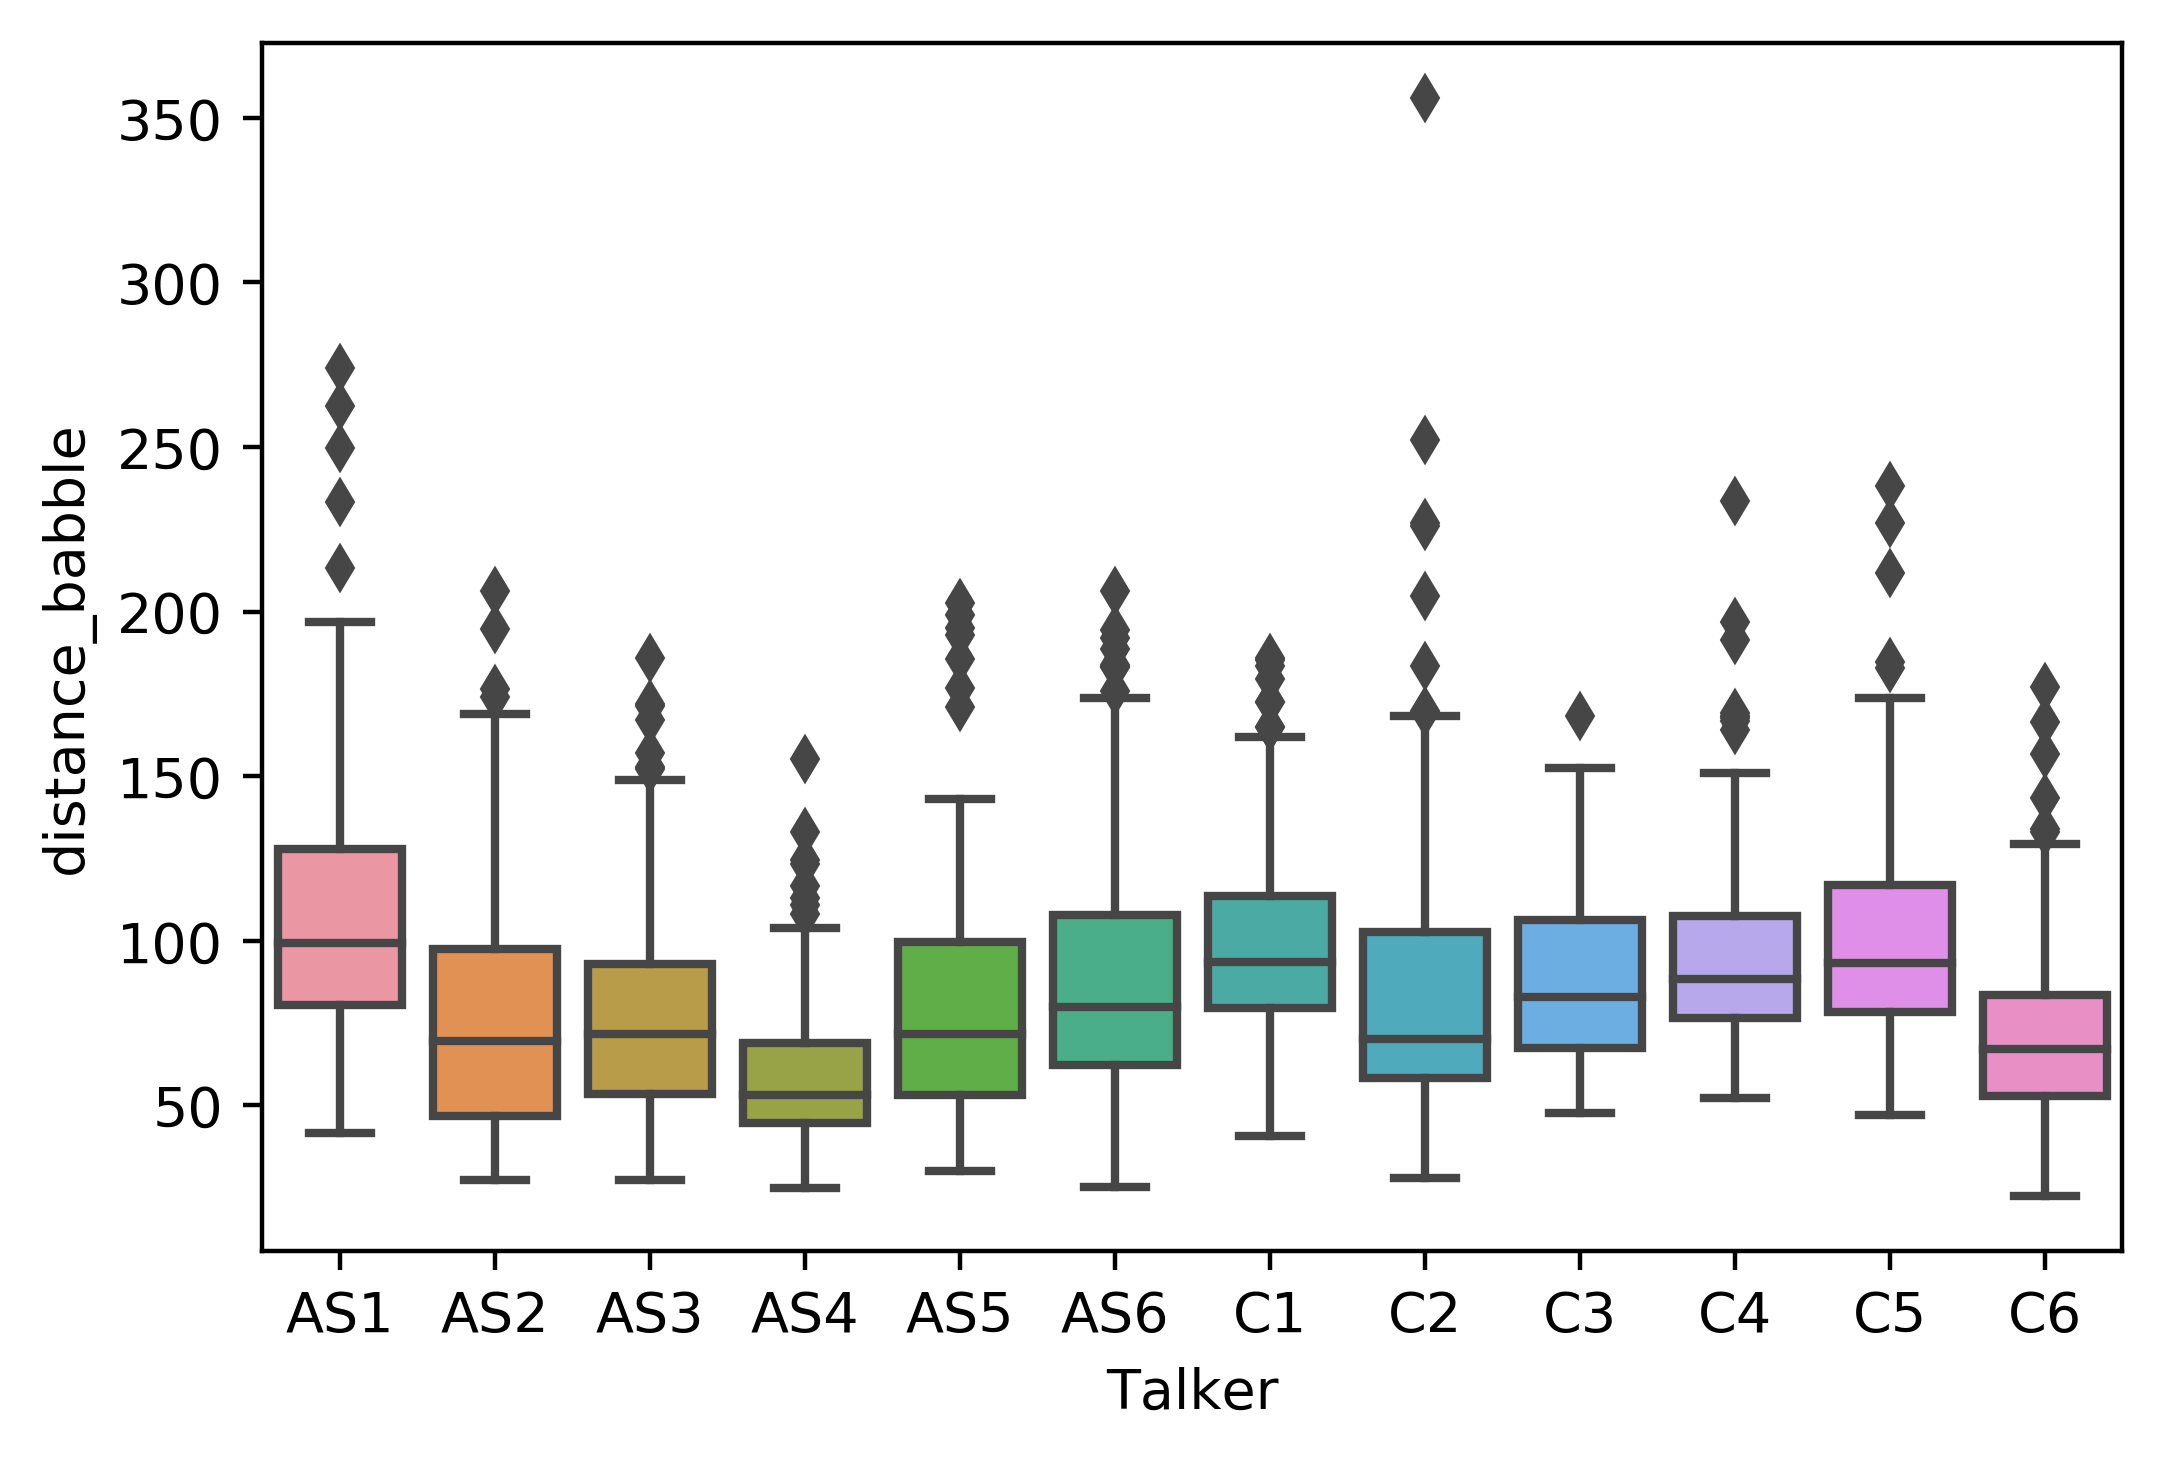

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(dpi = 400)
sns.boxplot(x ='Talker', y ='distance_babble', data = euclidist_df)


# Distance between SSN and NC by category

<AxesSubplot:xlabel='Category', ylabel='distance_SSN'>

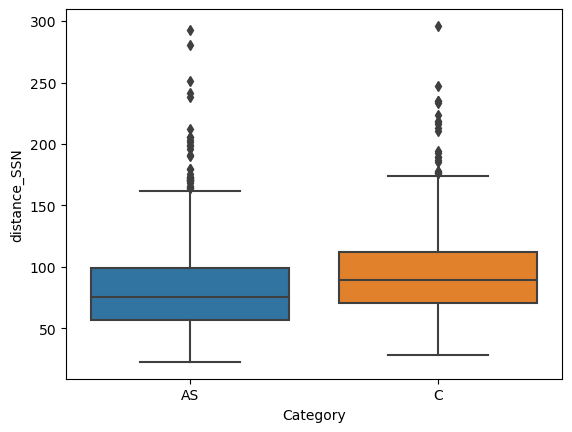

In [81]:

sns.boxplot(x ='Category', y ='distance_SSN', data = euclidist_df)

# DISTANCE between Asperger and Control in all noise conditions

In [82]:
# euclidean distance at NC, SSN, babble
d = []
condition = []

for noise in df_all.Noise.unique():
    reference = df_all.loc[
        (df_all['Noise'] == noise) & (df_all['Category'] == 'C') 
    ].index # reference idxs for noise x category C

    avg_C = np.mean(data_all[reference], axis = 0) # centroid of the talker in the C category

    reference = df_all.loc[
        (df_all['Noise'] == noise) & (df_all['Category'] == 'AS') 
    ].index # reference idxs for noise x category AS

    # distance noise x AS (all) from mean(noise x C)
    distance = np.sqrt(np.sum(np.square(data_all[reference]-avg_C), axis=1))

    d.append(distance)
    condition.append([noise]*len(distance))

In [83]:
euclid_dist = np.concatenate(d, axis=0)
condition = np.concatenate(condition, axis=0)

In [84]:
euclidist_df = pd.DataFrame(
{
'Condition': condition,
'distance': euclid_dist
}
)
euclidist_df

,Condition,distance
0,NC,155.931279
1,NC,96.262589
2,NC,136.997928
3,NC,116.559580
4,NC,169.098013
...,...,...
2509,babble,144.006087
2510,babble,43.255013
2511,babble,74.143589
2512,babble,65.328615


<AxesSubplot:xlabel='Condition', ylabel='distance'>

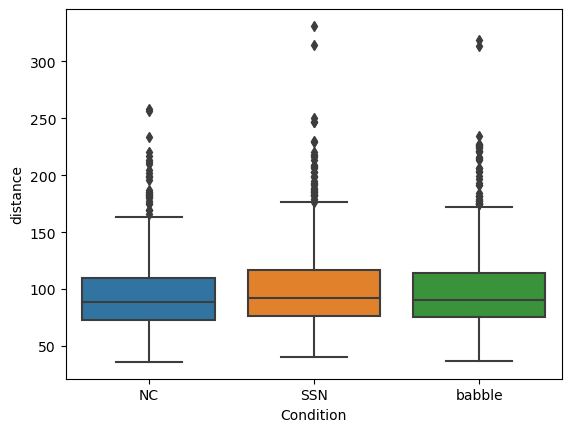

In [85]:
sns.boxplot(x ='Condition', y ='distance', data = euclidist_df)